
Посмотрим сначала на аттрактор Лоренца, что все работает из ссылки в репозитории

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def lorenz(x, y, z, s, r, b):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [7]:
dt = 0.01
num_steps = 10000

In [8]:
# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

In [9]:
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s=10, r=28, b=2.667)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

X = [xs, ys, zs]

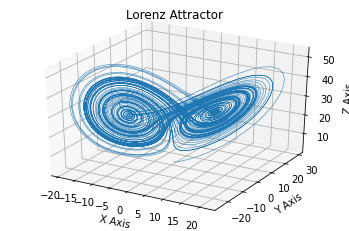

In [10]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

В самом простом приблежении начнем с класической обратной задачи и восстановим коэффициенты в уравненнии Лоренца по известному решению X. Для этого можно составить функцию, минимизирую которую мы будем получать решение максимально близкое к X. Минимизируемая функция - objective function будет выглядить как сумма расстоянии между точками траектории исходного аттрактора Лоренца X и аттрактора с подобранными коэффициентами. 


Так как Уравнения Лоренца весьма чувствительны к вохдным параметрам, то оптимизируема функция скорее всего будет иметь много локальных экстремумов, поэтому в качестве оптимизатора возьмем differential_evolution  стандартный метод библиотеки scipy.optimize для поиска глобального оптимума. На вход данный алгоритм требует - оптимизируемую функцию и границы поиска для оптимизируемы параметров.

In [1]:
import numpy as np
from scipy.optimize import minimize, differential_evolution

In [11]:
def Obj(param):
    """The Objective function"""
    dt = 0.01 #time step
    num_steps = 10000 #number of time steps
    
    #initial arrays for trajectory
    xi = np.empty(num_steps + 1)
    yi = np.empty(num_steps + 1)
    zi = np.empty(num_steps + 1)

    #initial conditions
    xi[0], yi[0], zi[0] = (0., 1., 1.05)

    #trajectory calculation
    for idx in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xi[idx], yi[idx], zi[idx], param[0],  param[1], param[2])
        xi[idx + 1] = xi[idx] + (x_dot * dt)
        yi[idx + 1] = yi[idx] + (y_dot * dt)
        zi[idx + 1] = zi[idx] + (z_dot * dt)

    #cost = np.linalg.norm(X[0] - xi)/np.linalg.norm(X[0]) + np.linalg.norm(X[1] - yi)/np.linalg.norm(X[1]) + np.linalg.norm(X[2] - zi)/np.linalg.norm(X[2])
    cost = np.sum(np.sqrt((X[0]- xi)**2 + (X[1]- yi)**2 + (X[2]- zi)**2))/(np.sum(np.sqrt(X[0]**2 + X[1]**2 + X[2]**2)))
    return cost

Зададим ограничения для коэффциентов $s \in [7; 15]$, $r \in [20; 30]$, $b \in [1; 4]$. В целом по физическому смыслу на коэффициенты накладывается только ограничение положительности, в дальнейшем можно пробовать оптимизировать параметры по очереди с изменением отдельно она поиска для каждого параметра системы уравнений.

In [12]:
bounds = [(7, 15), (20, 30), (1, 4)]
res_evol = differential_evolution(Obj, bounds, maxiter=500000)

In [14]:
print(res_evol.x, res_evol.fun)

[ 8.21136106 26.31367035  1.01582604] 0.49527088877529923


Полученные коэффициенты близки к исходным, однако как мы знаем решение системы очень увствительно к изменению параметров систему, и значение целевой функции получилось равным 0.5, что достаточно плохо для выбранной метрики. Посмотрим как выглядит траектория с найденными параметрами.

In [15]:
# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
dt = 0.01
num_steps = 10000
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s=res_evol.x[0], r=res_evol.x[1], b=res_evol.x[2])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

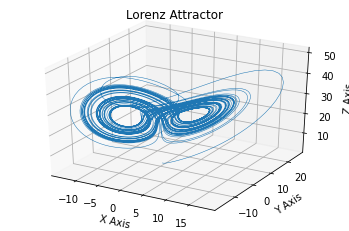

In [16]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Траектория визуально достаточно похожа на начальную, однако значение целевой функции слишком большое. Данный метод плохо подходит для решение поставленной обратной задачи. Следующим шагом может быть регресионный подход. Из системы уравнений можно выразить параметры как неизвестные и составить систему линейных уравнений, затем с помощью стандартных методов регресси можно искать неизвестные параметры системы.